# CAP 5768 - Data Science - Dr. Marques - Fall 2020

# Assignment 4: Machine Learning
## STARTER CODE

Name: Jacob Perrone
### link to live version on google  colab:
https://colab.research.google.com/drive/1zuYL23Vh0sljB7SZV-UpbKeIzF-8fDbh?usp=sharing

### Goals 

- To learn how to implement a Data Science / Machine Learning workflow in Python (using Pandas, Scikit-learn, Matplotlib, and Numpy)
- To learn how to use perform linear regression by least squares using Python and scikit-learn.
- To appreciate that the same linear regression coefficients may be the best fit for dramatically different data distributions -- as illustrated by the Anscombe's quartet.
- To practice with different types of regularization (*lasso* and *ridge*) and understand when to use them.
- To learn how to implement several different machine learning classification models in Python 
- To learn how to evaluate and fine-tune the performance of a model using cross-validation
- To learn how to test a model and produce a set of plots and performance measures
- To expand upon the prior experience of manipulating, summarizing, and visualizing representative datasets  in data science and machine learning

### Instructions

- This assignment is structured in 3 parts, each using their own dataset(s).
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- **The number of points is indicated next to each part. They add up to 100.**
- **There are additional (10 points worth of) bonus items**, which are, of course optional. 

### Important

- For the sake of reproducibility, use `random_state=0` (or equivalent) in all functions that use random number generation.
- It is OK to attempt the bonus points, but please **do not overdo it!** 


---------
### Imports + Google Drive

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 53.8MB 749kB/s
     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 71kB 6.0MB/s 
     |████████████████████████████████| 604kB 30.5MB/s 
     |████████████████████████████████| 3.1MB 36.3MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 296kB 41.8MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=f9f5c88e0194a8ac0695df209728c9c12706a6c06169939e9977ff4929cda3dc
  Stored in directory: /tmp/pip-ephem-wheel-cache-6joxg_w1/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=5dc3b54eee1eed8814c8d5d69e1b4226e159b84ba34312d7d554a6e83efd3305
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=2919

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()
import scipy.stats as ss
from pandas_profiling import ProfileReport

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 1: Regression Analysis


-----------
### 1a. Linear regression by least squares

In this part, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the *illiteracy* rate.

The Python code below plots the fertility versus illiteracy and computes the Pearson correlation coefficient. The Numpy array `illiteracy` has the illiteracy rate among females for most of the world's nations. The array `fertility` has the corresponding fertility data.

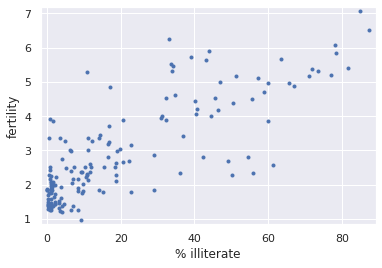

Pearson correlation coefficient between illiteracy and fertility: 0.80413


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/female_literacy_fertility.csv') 
# df = pd.read_csv('data/female_literacy_fertility.csv')
illiteracy = 100 - df['female literacy']
fertility = df['fertility']

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('% illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print('Pearson correlation coefficient between illiteracy and fertility: {:.5f}'.format(pearson_r(illiteracy, fertility)))

### 1.1 Your turn! (5 points)

We will assume that fertility is a linear function of the female illiteracy rate: `f=ai+b`, where `a` is the slope and `b` is the intercept. 

We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. 

The slope tells us how the fertility rate varies with illiteracy. 
We can find the best fit line .

Write code to plot the data and the best fit line (using `np.polyfit()`) and print out the slope and intercept.

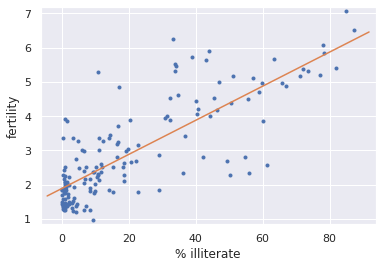

 the slope of the best fit line is:  0.04979854809063423
 the intercept of the best fit line is:  1.888050610636557


In [ ]:
# ENTER YOUR CODE HERE
# Set parameters for best fit line
line = np.polyfit(illiteracy, fertility, 1)
slope = line[0]
intercept = line[1]

# graph shown above
plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# set x and y values for best fit line
x_values = np.array(plt.gca().get_xlim())
y_values = intercept + slope * x_values
plt.plot(x_values, y_values, '-')

# margins and labels from above
plt.margins(0.02)
plt.xlabel('% illiterate')
plt.ylabel('fertility')
plt.show()

# print the slope and intercept
print(" the slope of the best fit line is: ",slope)
print(" the intercept of the best fit line is: ",intercept)


-------------------
### 1b. Anscombe's quartet

The Anscombe's quartet is a collection of four small data sets that have nearly identical simple descriptive statistics, yet have very different distributions. Each dataset consists of 11 `(x,y)` points. The quartet was created in 1973 by the statistician Francis Anscombe to demonstrate: the importance of visualization and exploratory data analysis (EDA), the effect of outliers and other influential observations on statistical properties, and the limitations of summary statistics (\*).

(\*) See https://heap.io/blog/data-stories/anscombes-quartet-and-why-summary-statistics-dont-tell-the-whole-story if you're interested.

The Python code below performs a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

In [ ]:
x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

slope = 0.5000909090909095
intercept = 3.000090909090909


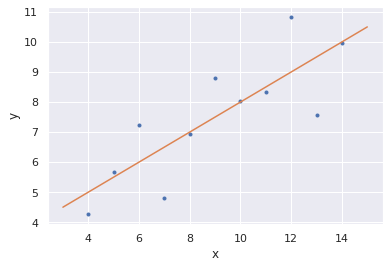

In [ ]:
# Perform linear regression: a, b
a, b = np.polyfit(x1, y1, 1)

# Print the slope and intercept
print('slope =', a)
print('intercept =', b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x1, y1, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

### 1.2 Your turn! (5 points)

### Linear regression on all Anscombe data

Write code to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, i.e. compute the slope and intercept for each set. 

The data are stored in lists (`anscombe_x = [x1, x2, x3, x4]` and `anscombe_y = [y1, y2, y3, y4]`), corresponding to the $x$ and $y$ values for each Anscombe data set.

In [ ]:
anscombe_x = [x1, x2, x3, x4]
anscombe_y = [y1, y2, y3, y4]

# ENTER YOUR CODE HERE
# fit quartet lines uaing zip to join the respective list items together
fit_quartet_lines = [np.polyfit(x,y,1) for x, y in zip(anscombe_x,anscombe_y)]

# print the slope and intercept for each quartet
[print(' anscombe {}: slope: {:.2f}, intercept: {:.2f}'.format(i,line[0],line[1])) for i, line in enumerate(fit_quartet_lines, start = 1)]

# test for all true round slope and intercept to 2 decimals using numpy allclose to determine precision
same = np.allclose(fit_quartet_lines, list([[0.5, 3.0]]* len(anscombe_x)), rtol = 1e-02)
print(' the slope and intercepts are the same: ', same)







 anscombe 1: slope: 0.50, intercept: 3.00
 anscombe 2: slope: 0.50, intercept: 3.00
 anscombe 3: slope: 0.50, intercept: 3.00
 anscombe 4: slope: 0.50, intercept: 3.00
 the slope and intercepts are the same:  True


-------------------
### 1c. Regression using scikit-learn

Now that we know the basics of linear regression, we will switch to scikit-learn, a powerful, workflow-oriented library for data science and machine learning.

The Python code below shows a simple linear regression example using scikit-learn. Note the use of the `fit()` and `predict()` methods.

[2.9776566]
-1.903310725531119


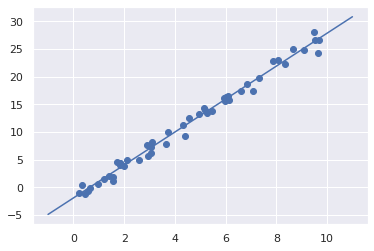

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data around the y = ax+b line where a=3 and b=-2
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 3 * x - 2 + rng.randn(50)

from sklearn.linear_model import LinearRegression

# Note: If you get a "ModuleNotFoundError: No module named 'sklearn'" error message, don't panic.
# It probably means you'll have to install the module by hand if you're using pip. 
# If you're using conda, you should not see any error message.

model = LinearRegression(fit_intercept=True)

X = x[:, np.newaxis]
X.shape

model.fit(X, y)
print(model.coef_)
print(model.intercept_)

xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit);

### 1d. Polynomial regression

One way to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take the multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

The code below shows a simple example of polynomial regression using the ``PolynomialFeatures`` transformer in scikit-learn. Concretely, it shows how we can use polynomial features with a polynomial of degree seven, i.e. $$y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots + a_7 x^7$$ 

It also introduces the notion of a *pipeline* in scikit-learn. "The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters." (https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) 

The R^2 score for the fit is:  0.9806993128749489


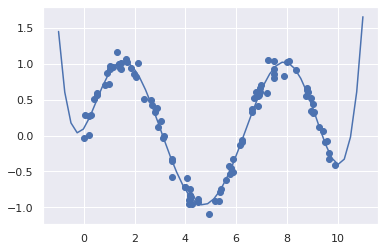

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

print('The R^2 score for the fit is: ', poly_model.score(x[:, np.newaxis], y))

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

### 1.3 Your turn! (10 points)

Write code to find the best degree/order for the polynomial basis functions (between 1 and 15) by computing the quality of the fit using a suitable metric, in this case the $R^2$ coefficient (which can be computer using the `score()` function). 

Remember that **the best possible score is 1.0**. The score can be negative (because the model can be arbitrarily worse). A score of 0 suggests a constant model that always predicts the expected value of y, disregarding the input features.

Hint: If you plot the score against the degree/order of the polynomial, you should see something like this:
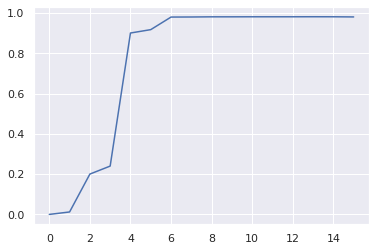


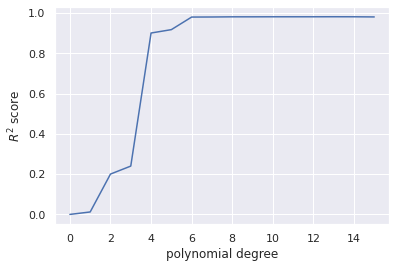

the best R^2 score was: 0.982 for degree 13


In [ ]:
# ENTER YOUR CODE HERE
# Samples from above
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

# function to compute r^2 scores
def get_r2_scores(order):
  model = make_pipeline(PolynomialFeatures(order), LinearRegression())
  model.fit(x[:, np.newaxis], y)
  return model.score(x[:, np.newaxis], y)

# R^2 scores and best order
scores = [get_r2_scores(degree) for degree in range(0,16)]

plt.plot(scores)
plt.ylabel('$R^2$ score')
plt.xlabel('polynomial degree')
plt.show()
print('the best R^2 score was: {:.3f} for degree {}'.format(np.max(scores), np.argmax(scores)))

### 1e. Regularization

The use of polynomial regression with high-order polynomials can very quickly lead to over-fitting. In this part, we will look into the use of regularization to address potential overfitting.

The code below shows an attempt to fit a 15th degree polynomial to a sinusoidal shaped data. The fit is excellent ($R^2$ > 0.98), but might raise suspicions that it will lead to overfitting.

0.9806993128749489


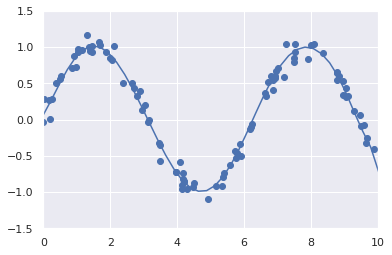

In [ ]:
model = make_pipeline(PolynomialFeatures(15),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

score = poly_model.score(x[:, np.newaxis], y)
print(score)

### 1.4 Your turn! (5 points)

Write Python code to perform Ridge regression ($L_2$ Regularization), plot the resulting fit, and compute the $R^2$ score.

Hints: 
1. This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator. 
2. In the beginning, use all default values for its parameters.
3. After you get your code to work, spend some time trying to fine-tune the model, i.e., experimenting with the regularization parameters.

the R^2 score is:  0.9788162291858987


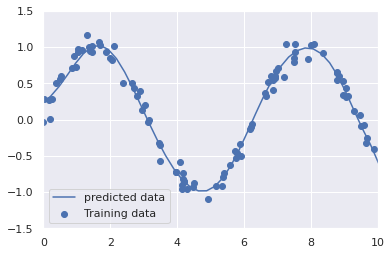

In [ ]:
# ENTER YOUR CODE HERE
from sklearn.linear_model import Ridge
# Samples from above
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

# test dataset
x_test = np.linspace(-1,11)

x = x[:,np.newaxis]
x_test = x_test[:,np.newaxis]

#pipeline using the ridge estimator
model = make_pipeline(PolynomialFeatures(15), Ridge(random_state=42))
model.fit(x,y)

# predict sample data from model
pred = model.predict(x_test)

# plot training data and predicted data
plt.scatter(x,y, label='Training data')
plt.plot(x_test, pred, label='predicted data')
plt.legend()
plt.xlim(0,10)
plt.ylim(-1.5,1.5)

# print score
score = model.score(x,y)
print('the R^2 score is: ',score)


### Fine Tuned Parameters:

Ridge uses a parameter called alpha for regularization. Having a good alpha will yield better results. scikit learn has a RidgeCV() class that can test alpha values against a given list to find the best one. To fine tune the parameters an alpha list is passed into RidgeCV() as well as an integer value to the cv parameter to avoid a bad fit (due to the default value). 


the R^2 score is:  0.9808793389082331
the chosen alpha value was:  0.1


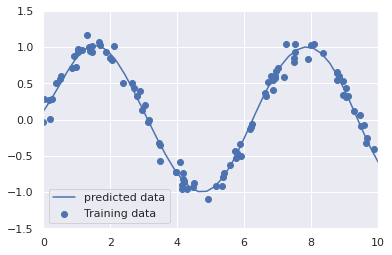

In [ ]:
from sklearn.linear_model import RidgeCV
# Samples from above
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

# test dataset
x_test = np.linspace(-1,11)

x = x[:,np.newaxis]
x_test = x_test[:,np.newaxis]

#pipeline using the ridge estimator
model = make_pipeline(PolynomialFeatures(15), RidgeCV([0.1, 0.5, 1.0, 2.0, 3.0], cv = 2))
model.fit(x,y)

# predict sample data from model
pred = model.predict(x_test)

# plot training data and predicted data
plt.scatter(x,y, label='Training data')
plt.plot(x_test, pred, label='predicted data')
plt.legend()
plt.xlim(0,10)
plt.ylim(-1.5,1.5)

# print score
score = model.score(x,y)
print('the R^2 score is: ',score)

# print alpha value chosen
print('the chosen alpha value was: ', model[1].alpha_)

### 1.5 Your turn! (5 points)

Write Python code to perform Lasso regression ($L_1$ Regularization), plot the resulting fit, and compute the $R^2$ score.

Hints: 
1. This type of penalized model is built into Scikit-Learn with the ``Lasso`` estimator. 
2. In the beginning, use `Lasso(alpha=0.1, tol=0.2)`
3. After you get your code to work, spend some time trying to fine-tune the model, i.e., experimenting with the regularization parameters.

the R^2 score is:  0.6754347956467595


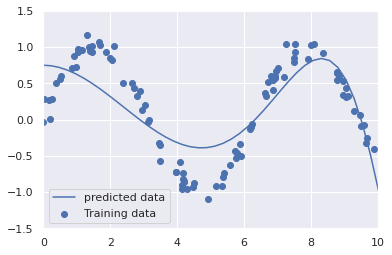

In [ ]:
# ENTER YOUR CODE HERE
from sklearn.linear_model import Lasso
# Samples from above
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

# test dataset
x_test = np.linspace(-1,11)

x = x[:,np.newaxis]
x_test = x_test[:,np.newaxis]

#pipeline using the ridge estimator
model = make_pipeline(PolynomialFeatures(15), Lasso(alpha = 0.1, tol = 0.2))
model.fit(x,y)

# predict sample data from model
pred = model.predict(x_test)

# plot training data and predicted data
plt.scatter(x,y, label='Training data')
plt.plot(x_test, pred, label='predicted data')
plt.legend()
plt.xlim(0,10)
plt.ylim(-1.5,1.5)

# print score
score = model.score(x,y)
print('the R^2 score is: ',score)

### Fine Tune parameters:

just like the Ridge estmator Lasso depends on alpha parameter. Also like the Ridge implentation there is a LassoCV() to test alpha values against a list and also try chaning the tol parameter as well.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.563025644711395, tolerance: 3.308070973162126
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.430416333143354, tolerance: 3.308070973162126
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7264779440933213, tolerance: 3.308070973162126
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to incre

the R^2 score is:  0.7555605178574069
the chosen alpha value was:  0.01


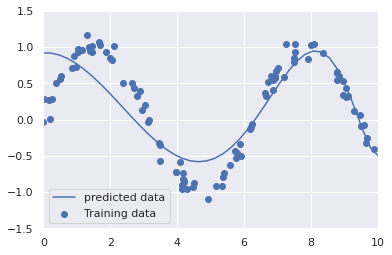

In [ ]:
from sklearn.linear_model import LassoCV
# Samples from above
rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

# test dataset
x_test = np.linspace(-1,11)

x = x[:,np.newaxis]
x_test = x_test[:,np.newaxis]

#pipeline using the ridge estimator
model = make_pipeline(PolynomialFeatures(15), LassoCV(alphas=[0.01, 0.05, 0.1, 0.5],tol = 0.1, cv = 5))
model.fit(x,y)

# predict sample data from model
pred = model.predict(x_test)

# plot training data and predicted data
plt.scatter(x,y, label='Training data')
plt.plot(x_test, pred, label='predicted data')
plt.legend()
plt.xlim(0,10)
plt.ylim(-1.5,1.5)

# print score
score = model.score(x,y)
print('the R^2 score is: ',score)

# print alpha value chosen
print('the chosen alpha value was: ', model[1].alpha_)

### * more fine tuning is needed to get a better R^2 score

### 1f. The housing problem
The Boston housing dataset is a classic dataset used in linear regression examples.
(See https://scikit-learn.org/stable/datasets/index.html#boston-dataset for more)

The Python code below:
- Loads the Boston dataset (using scikit-learn's `load_boston()`) and converts it into a Pandas dataframe
- Selects two features to be used for fitting a model that will then be used to make predictions: LSTAT (% lower status of the population) and RM (average number of rooms per dwelling) (\*)
- Splits the data into train and test sets

(\*) See https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 for details.

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston['MEDV'] = boston_dataset.target
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


#### (OPTIONAL EDA)

The (innocent-looking) lines of code below use Pandas Profiling to produce rich reports, plots and insights on the dataset.

Read more about it:

*   https://pypi.org/project/pandas-profiling/ 
*   https://www.datacourses.com/pandas-1150/ 
*   https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html 
*   https://medium.com/analytics-vidhya/pandas-profiling-5ecd0b977ecd  

In [ ]:
# fun with pandas_profiling
profile = ProfileReport(boston, title='Pandas Profiling Report for Boston Housing Dataset', explorative=True)

In [ ]:
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

### 1.6 Bonus! (10 points)

Write Python code to:

1. Fit a linear model to the data.
2. Compute and print the RMSE and $R^2$ score for both train and test datasets.
3. Fit a polynomial model (of degree 4) to the data.
4. Compute and print the RMSE and $R^2$ score for both train and test datasets.
5. Apply Ridge regression to the polynomial model.
4. Compute and print the RMSE and $R^2$ score for both train and test datasets.

In [ ]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

-------------------
## Part 2: Classification

### 2a. The Iris dataset 

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each: 
- sepal length in cm; 
- sepal width in cm; 
- petal length in cm; and 
- petal width in cm. 

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Histograms, pair plots and summary statistics 

The code below:

1. Computes and displays relevant summary statistics for the whole dataset.
2. Displays the pair plots for all (4) attributes for all (3) categories / species / classes in the Iris dataset. 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


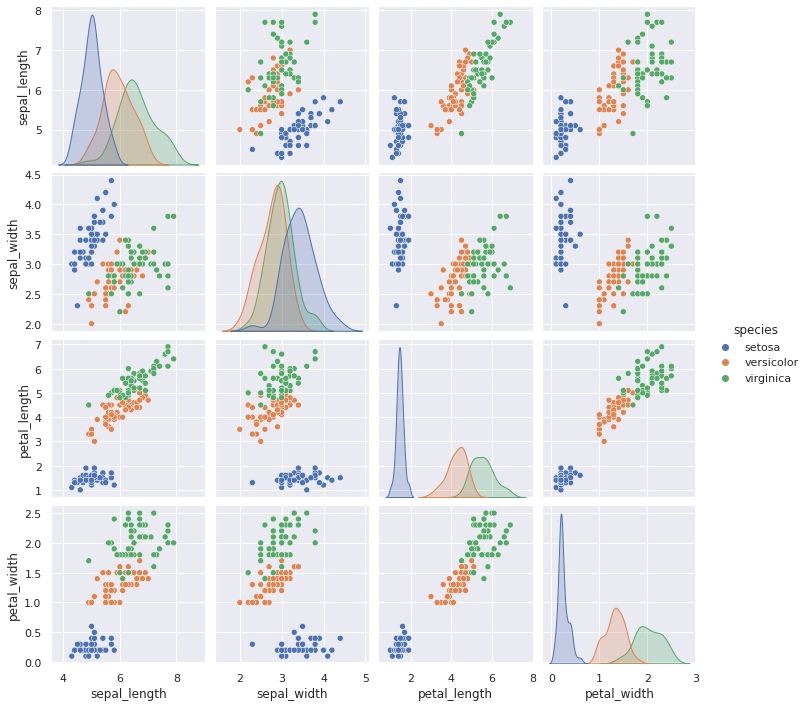

In [ ]:
# Display pair plot
sns.pairplot(iris, hue='species', height=2.5);

# Display summary statistics for the whole dataset
iris.describe()

### 2.1 Your turn! (15 points)
Write code to: 

1. Build a decision tree classifier using scikit-learn's `DecisionTreeClassifier` (using the default options). Check documentation at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 
2. Plot the resulting decision tree. 
(Note: if `graphviz` gives you headaches, a text-based 'plot'-- using `export_text` -- should be OK.)
3. Perform k-fold cross-validation using k=3 and display the results. 


|--- feature_3 <= 0.80
|   |--- class: setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: versicolor
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: virginica
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: virginica
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: versicolor
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: virginica



array([0.98, 0.98, 0.96])

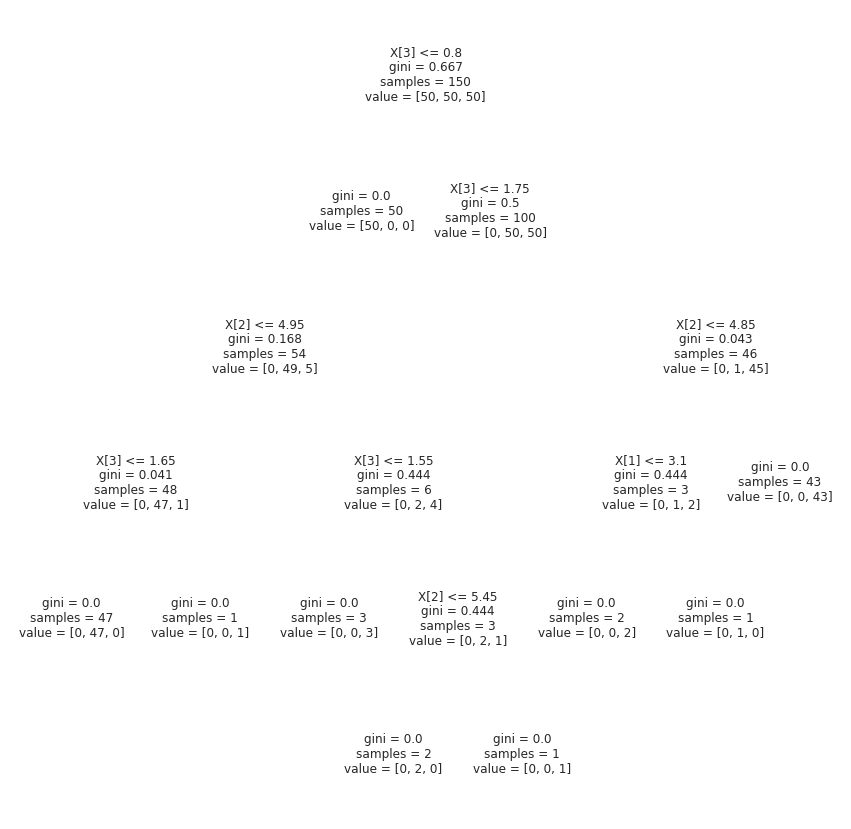

In [ ]:
# ENTER YOUR CODE HERE
from sklearn import tree
from sklearn.tree import export_text
#features and labels for dataset
x = iris.iloc[:,:-1]
y = iris.species

# 1.) build the decision tree with default options
decision_tree = tree.DecisionTreeClassifier(random_state = 0)
decision_tree.fit(x,y)

# 2.) show tree by using plot_tree, graphviz was not rendering the tree 
tree.plot_tree(decision_tree)
# also plot using export text
tr = export_text(decision_tree)
print(tr)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# 3.) cross fold validation using k = 3 and shuffling data in case of ordering
cross_validation = KFold(n_splits = 3, shuffle = True, random_state = 0)
cross_val_score(decision_tree, x, y,  cv = cross_validation)



### 2b. Digit classification

The MNIST handwritten digit dataset consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each image in the dataset has 28$\times$28 pixels. 

The Python code below loads the images from the MNIST dataset, flattens them, normalizes them (i.e., maps the intensity values from [0..255] to [0..1]), and displays a few images from the training set.

In [ ]:
from keras.datasets import mnist

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

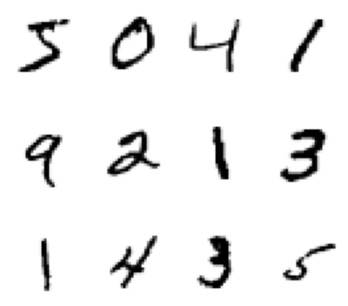

In [ ]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_valid[0]

7

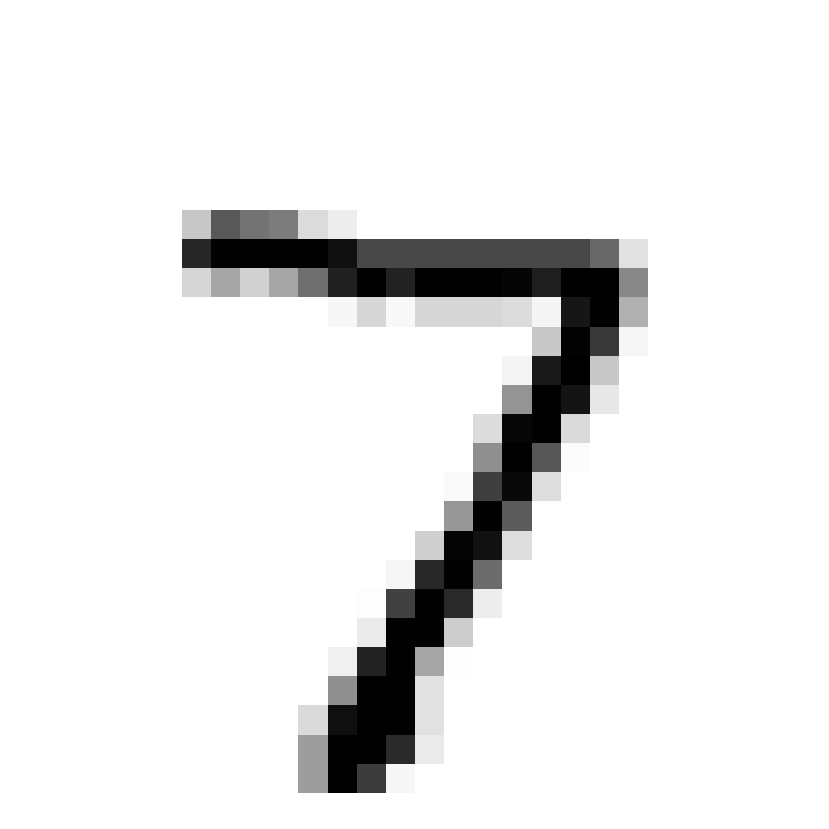

In [ ]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [ ]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [ ]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### 2.2 Your turn! (10 points)

Write code to: 

1. Build and fit a 10-class Naive Bayes classifier using scikit-learn's `MultinomialNB()` with default options and using the raw pixel values as features. 
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix.

Hint: your accuracy will be around 83.5%

Accuracy:  0.8357


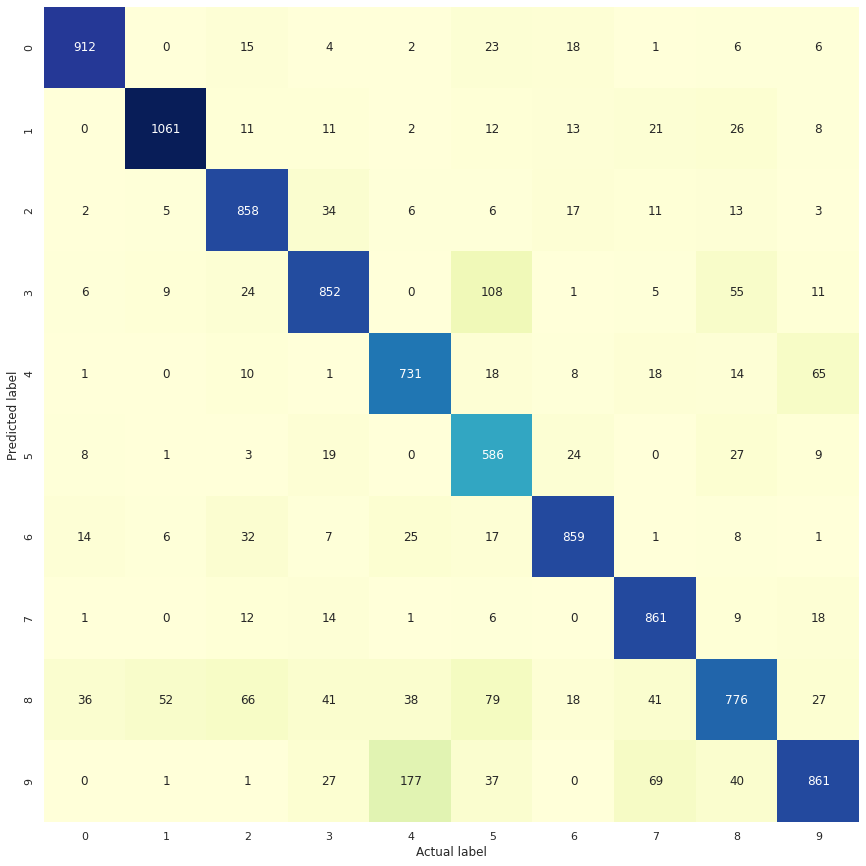

In [ ]:
# ENTER YOUR CODE HERE
from sklearn.naive_bayes import MultinomialNB
NBC = MultinomialNB()
NBC.fit(X_training, y_train)
pred = NBC.predict(X_validation)

#predict accuracy and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
matrix = confusion_matrix(y_valid, pred)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlGnBu')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
print('Accuracy: ',accuracy_score(y_valid, pred))

### 2.3 Your turn! (10 points)

Write code to: 

1. Build and fit a 10-class Random Forests classifier using scikit-learn's `RandomForestClassifier()` with default options (don't forget `random_state=0`) and using the raw pixel values as features. 
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. 

Hint: your accuracy should be > 90%

Accuracy:  0.9469


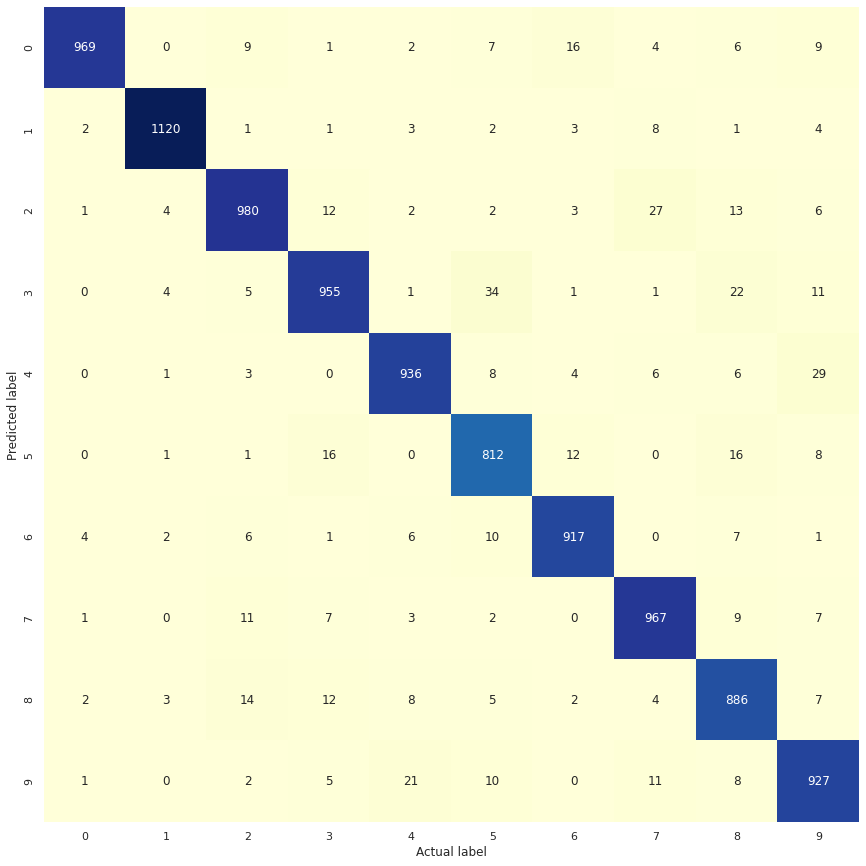

In [ ]:
# ENTER YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_jobs = -1, n_estimators = 10, random_state=0)
RFC.fit(X_training, y_train)
pred_RFC = RFC.predict(X_validation)

#predict accuracy and show confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
matrix = confusion_matrix(y_valid, pred_RFC)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlGnBu')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
print('Accuracy: ',accuracy_score(y_valid, pred_RFC))

### 2.4 Your turn! (10 points)

Write code to: 

1. Build and fit a 10-class classifier of your choice, with sensible initialization options, and using the raw pixel values as features. 
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. 

Hint: A variation of the Random Forests classifier from 2.2 above is acceptable. In that case, document your selection of (hyper)parameters and your rationale for choosing them.

### Variation of Random forests classifier from 2.3:
For my chosen claassifier I played with the n_estimators and bootstrap parameters. I found that having the bootstrap parameter set to False yielded higher accuracy than when set to True. changing the estimator's parameter was under the assumption that more results would lead to better accuracy (thus larger n_estimator values needed). setting the n_estimator to 200 and bootstrap to False gave a good imporvvement to the 2.3 random forest and there was only an insignificant accuracy gain when n_estimator was greater than 200. 

Accuracy:  0.9731


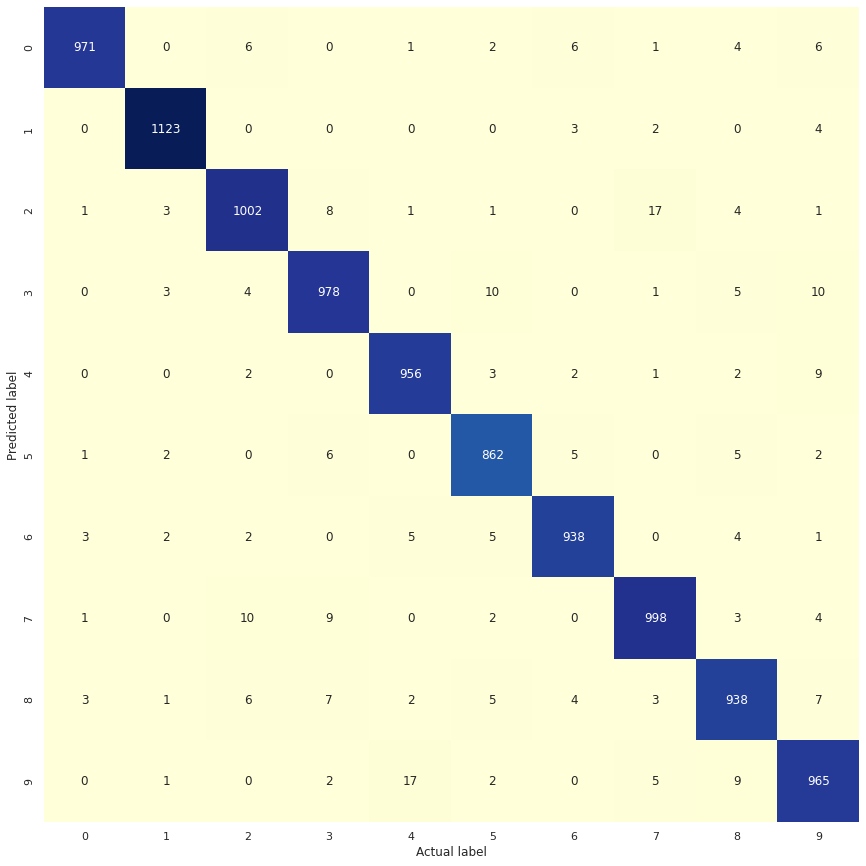

In [ ]:
# ENTER YOUR CODE HERE
RFC = RandomForestClassifier(n_jobs = -1, n_estimators = 200, random_state=0, bootstrap=False)
RFC.fit(X_training, y_train)
pred_RFC = RFC.predict(X_validation)

#predict accuracy and show confusion matrix
matrix = confusion_matrix(y_valid, pred_RFC)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlGnBu')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
print('Accuracy: ',accuracy_score(y_valid, pred_RFC))

## Part 3: Face Recognition using PCA (eigenfaces)

In this part you will build a face recognition solution.

We will use a subset of the Labeled Faces in the Wild (LFW) people dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

The Python code below loads a dataset of 1867 images (resized to 62 $\times$ 47 pixels) from the dataset and displays some of them.

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=40)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Arnold Schwarzenegger' 'Colin Powell' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Capriati'
 'John Ashcroft' 'Junichiro Koizumi' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Serena Williams' 'Tony Blair'
 'Vladimir Putin']
(1867, 62, 47)


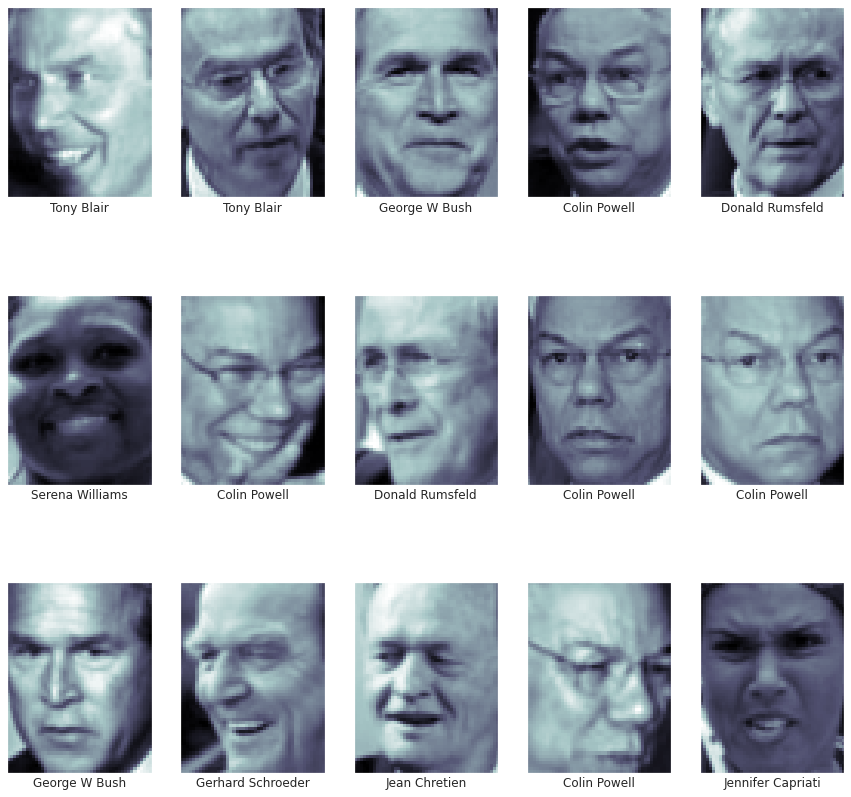

In [ ]:
plt.rcParams["figure.figsize"]=15,15
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

#### 3.1 Your turn! (15 points)

Write code to: 

1. Use Principal Component Analysis (PCA) to reduce the dimensionality of each face to the first 120 components. 
2. Build and fit a multi-class SVM classifier, with sensible initialization options, and using the PCA-reduced  features. 
3. Make predictions on the test data, compute the precision, recall and f1 score for each category, compute the overall accuracy, and plot the resulting confusing matrix. 
4. Display examples of correct and incorrect predictions (at least 5 of each). 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


Accuracy:  0.7987152034261242
                           precision    recall  f1-score   support

             Ariel Sharon       0.74      0.74      0.74        19
    Arnold Schwarzenegger       0.50      0.18      0.27        11
             Colin Powell       0.81      0.80      0.80        59
          Donald Rumsfeld       0.70      0.87      0.78        30
            George W Bush       0.77      0.89      0.83       133
        Gerhard Schroeder       0.89      0.93      0.91        27
  Gloria Macapagal Arroyo       1.00      1.00      1.00        11
              Hugo Chavez       0.89      0.89      0.89        18
           Jacques Chirac       0.75      0.69      0.72        13
            Jean Chretien       1.00      0.36      0.53        14
        Jennifer Capriati       0.83      0.45      0.59        11
            John Ashcroft       0.71      0.77      0.74        13
        Junichiro Koizumi       1.00      0.87      0.93        15
               Laura Bush      

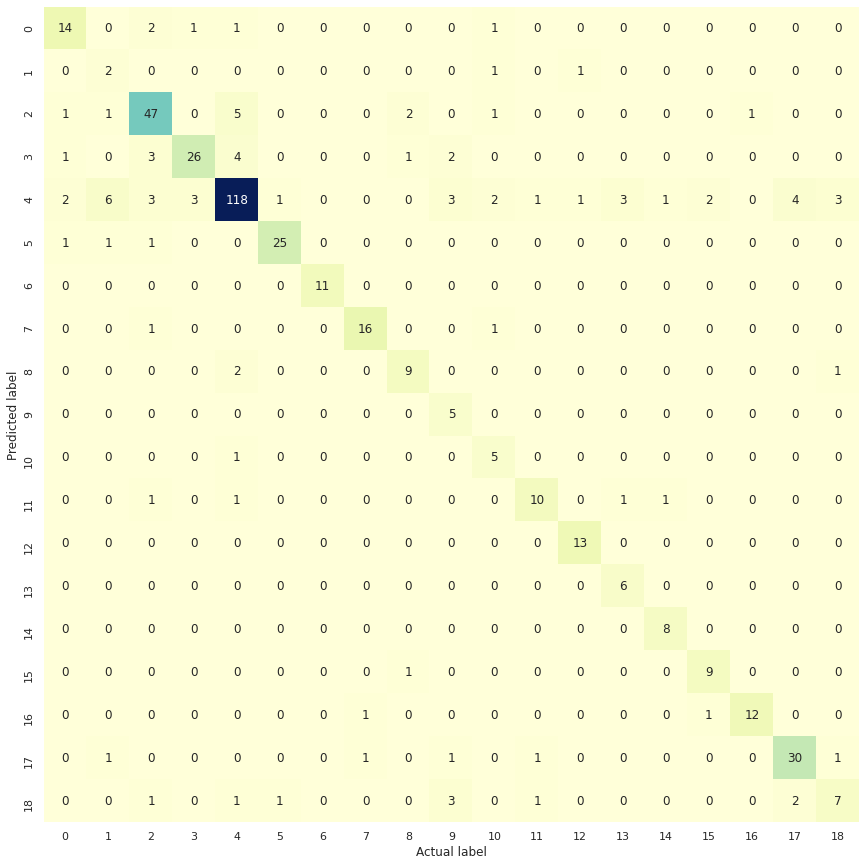

In [ ]:
# ENTER YOUR CODE HERE
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(faces.data, faces.target, stratify= faces.target, test_size = 0.25, random_state=0)

# 1.), 2.)PCA and SVM classifier
from sklearn.decomposition import PCA
Num_Components = 120
pca = PCA(n_components = Num_Components, whiten = True, random_state=0)
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
svc = SVC(kernel='rbf', class_weight='balanced', random_state=0)
model = make_pipeline(pca,svc)
# use GridSearchCV to find the best parameters with cv = 3 and iid = false
param_grid= {'svc__C': [1,5,10,50], 'svc__gamma':[0.0001,0.0005,0.001,0.005,0.01]}
grid = GridSearchCV(model, param_grid, cv=3, iid=False, n_jobs=-1)
grid.fit(xTrain,yTrain)

# 3.) Predict and show results and confusion matrix
svcClf = grid.best_estimator_
pred = svcClf.predict(xTest)
print('Accuracy: ', accuracy_score(yTest,pred))
matrix = confusion_matrix(yTest,pred)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, cmap='YlGnBu')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
from sklearn.metrics import classification_report
print(classification_report(yTest,pred,target_names=faces.target_names))




### *part 4 was seperated because the confusion matrix would appear in the middle of the correct and incorrect predictions

In [ ]:
# 4.) display correct and incorrect faces, uses helper function to plot
def plot_faces(faces_to_show, labels_to_show, num_faces, show_name=True):
  fig, ax = plt.subplots(1, num_faces, figsize=(num_faces, 1.5), squeeze=False)
  for i, axi in enumerate(ax.flat):
    axi.imshow(faces_to_show[i].reshape(62,47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    if show_name:
      axi.set_xlabel(faces.target_names[labels_to_show[i]].split()[-1][:10])
  plt.show()

for i, name in enumerate(faces.target_names):
  print('\n{} -----------------'.format(name))

  #correct predictions
  mask = (yTest==i) & (pred==i)
  sum_faces = sum(mask)
  num_faces = min(10, sum(mask))
  print('{} of {} correct predicitions'.format(num_faces,sum_faces))
  plot_faces(xTest[mask], pred[mask], num_faces,show_name=False)

  #False negative predictions: predicted as someone else
  mask = (yTest==i) & (pred!=i)
  sum_faces = sum(mask)
  num_faces = min(10, sum(mask))
  print('{} of {} correct predicitions'.format(num_faces,sum_faces))
  if num_faces > 0:
     plot_faces(xTest[mask], pred[mask], num_faces)
  
  #False positive predictions: someone else predicted as them
  mask = (yTest!=i) & (pred==i)
  sum_faces = sum(mask)
  num_faces = min(10, sum(mask))
  print('{} of {} correct predicitions'.format(num_faces,sum_faces))
  if num_faces > 0:
     plot_faces(xTest[mask], pred[mask], num_faces)
 

Output hidden; open in https://colab.research.google.com to view.

### Conclusions (10 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

### Learned: 
- How important random_state was to getting consistent results in scikit learn
-How to use GridSearchCV() to find the best parameters for a classifier
-How simple Naive-Bayes classifiers are to use even for complex tasks
- Using seaborn heatmap for the confusion matrixes
- How good the RandomForestClassifiers performed

### Fun, time_consuming, enlightening, tedious:
###- Fun:
- Training the classifiers and changing the parameters to see how it performs 
- Expanding my knowledge gained from the other assignments and the AI course

###- Time-consuming:
- trying new parameters for the classifiers
- learning the scikit learn APIs 

###- Tedious:
- getting so close to finding the right parameters but still not getting a higher accuracy on the classifiers

### Additional week to work on this assignment:
- I would have attempted the bonus point questions
- I would have looked into how to deal with imbalanced datasets more
